 ## 📌 ACTIVIDAD 2: UN CASO DE REGRESIÓN MÁS REAL.


Crea el notebook saa_u03_p01_a2-<tus_iniciales>.ipynb donde entregar esta actividad. En el fichero
centro-comercial.csv tenemos registrada la facturación semanal conseguida en unos 45 centros
comerciales de una cadena de supermercados registrada un día concreto de cada semana. Tenemos
datos de varios años y queremos tener un modelo de Machine Learning que nos permita predecir las
ventas semanales a partir de otros datos que se indiquen.

 Nota: este ejercicio tiene un obstáculo que debes detectar para poder resolverlo de manera correcta (a mi
se me ocurren dos posibles soluciones aplicadas en la fase de preprocesamiento y en el ajuste de
parámetros, aunque solamente he probado una y es posible que haya más).

### COMPARATIVA DE VARIOS REGRESORES

Carga en un DataFrame el archivo centro-comercial.csv y realiza este preprocesamiento básico:
análisis exploratorio de datos y selección de características.

In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('../U03_Recursos/U03_P01_Regresiones/centro-comercial.csv')
df.head()

,centro,fecha,ventas_semanales,festivo,temperatura,precio_gasolina,IPC,desempleo
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


PRIMERA ETAPA: EDA.

 • Muestra unas filas del dataset y cuantas características y ejemplos tiene

In [168]:
# Ver dimensiones
print(f"Número de ejemplos: {df.shape[0]}")
print(f"Número de características: {df.shape[1]}")

Número de ejemplos: 6435
Número de características: 8


 • Cambiar la característica fecha por 3 características nuevas: día de la semana, mes y año.
Puedes convertir las fechas en tipo Date con la función de pandas to_datetime(fecha,
formato) donde tendrás que indicar el formato porque utiliza por defecto el inglés. El formato
es un texto con comodines donde %d es el día, %m es el mes y %Y es el año con 4 dígitos. Cuando
la tengas convertida a tipo Date puedes extraerle información con expresiones como
pd.fecha.dt.year que te devuelve el año.

In [169]:
# Convertir fecha a datetime con el día primero
df['fecha'] = pd.to_datetime(df['fecha'], dayfirst=True)

# Extraer día, mes y año
df['dia_semana'] = df['fecha'].dt.dayofweek
df['mes'] = df['fecha'].dt.month
df['año'] = df['fecha'].dt.year

# Eliminar la columna original de fecha
df.drop(columns=['fecha'], inplace=True)

• Ahora cuenta y muestra la cantidad de diferentes valores que tiene
cada característica con df.nunique() para detectar posibles problemas
(que haya 13 meses por ejemplo) o detectar las que quizás sean
booleanas (tendrán 2 valores) y en definitiva comprender mejor los
datos.

In [170]:
# Ver valores únicos por columna
display(df.nunique())

centro                45
ventas_semanales    6435
festivo                2
temperatura         3528
precio_gasolina      892
IPC                 2145
desempleo            349
dia_semana             1
mes                   12
año                    3
dtype: int64

 • Definimos una variable target que será "ventas_semanales" y otra de
tipo lista llamada predictoras que contenga el resto de características
menos el target.

In [171]:
# Definir target y predictoras
target = 'ventas_semanales'
predictoras = [col for col in df.columns if col != target]

# Clasificar numéricas y categóricas
nu = df[predictoras].nunique().sort_values()
nf = []; cf = []

for col in nu.index:
    if nu[col] < 0.005 * len(df):
        cf.append(col)
    else:
        nf.append(col)

print("Numéricas:", nf)
print("Categóricas:", cf)

Numéricas: ['centro', 'desempleo', 'precio_gasolina', 'IPC', 'temperatura']
Categóricas: ['dia_semana', 'festivo', 'año', 'mes']


 • Intentamos detectar qué características pueden ser pueden ser categóricas y cuales pueden ser
numéricas usando el criterio de la cantidad de valores diferentes que tengan. Si una
característica tiene menos del 0.5% de sus valores distintos es sospechosa de ser categórica
aunque sus valores sean numéricos. Completa el código que crea la lista nf con los nombres de
las características numéricas y la lista cf con las categóricas y las imprima:


 • Dibujar un histograma del target con seaborn por ejemplo usando histplot().


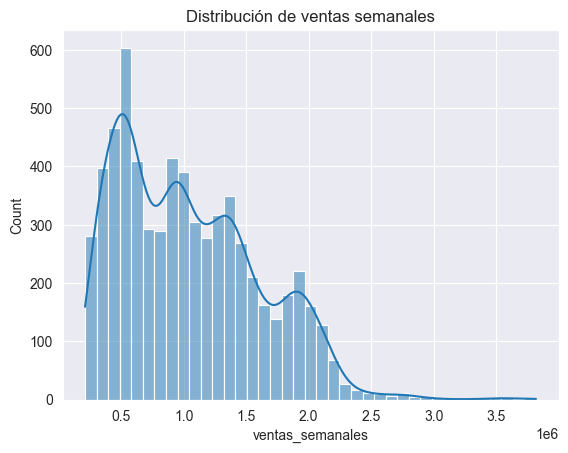

In [173]:
# Histograma del target
sns.histplot(df[target], kde=True)
plt.title('Distribución de ventas semanales')
plt.show()


 • Completa este código que dibuja las distribuciones de las características numéricas para que
aparezca debajo del histograma de cada característica su boxplot y nos permitan visualizar la
presencia de outliers, tal y como se ve en la figura.

In [174]:
len(nf)

5

                                           Distribuciones de Características Numéricas                                            


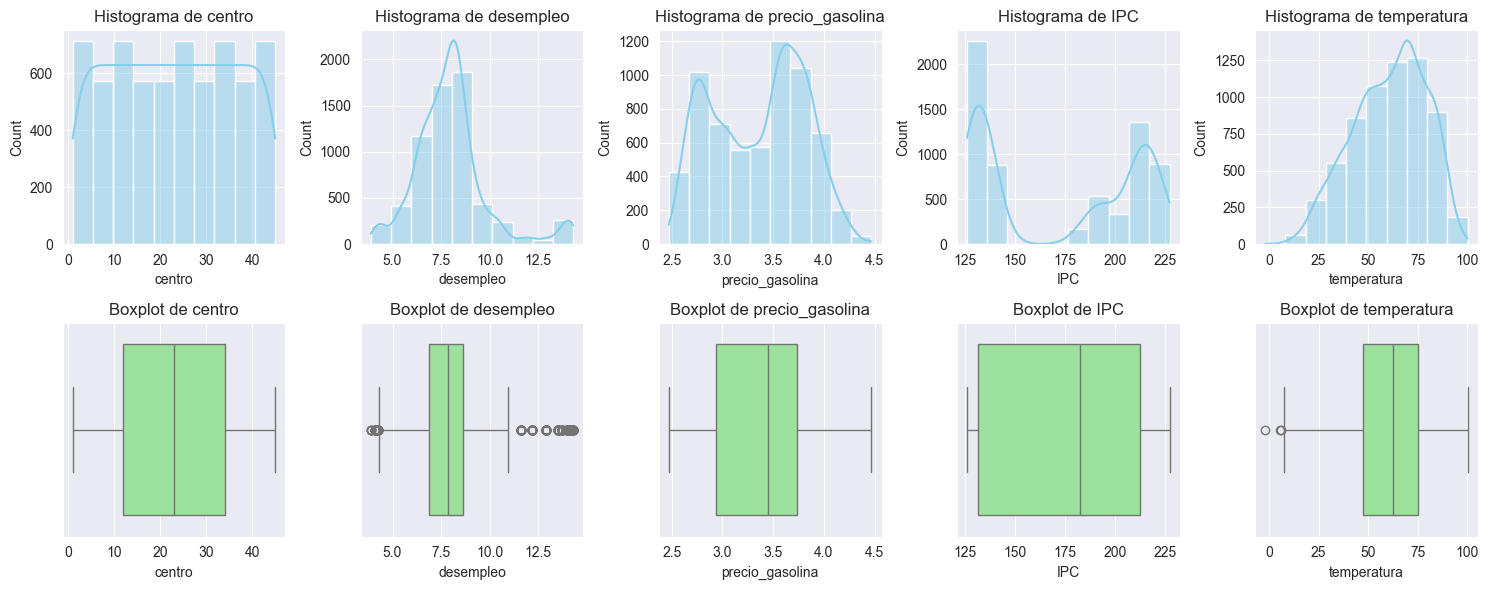

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

print('Distribuciones de Características Numéricas'.center(130))
n_cols = 5  # número de columnas en el grid
n_rows = math.ceil(len(nf) / n_cols)  # número de filas necesarias

fig, axes = plt.subplots(n_rows * 2, n_cols, figsize=(15, 6 * n_rows))  # doble fila por variable

for i, col in enumerate(nf):
    row = (i // n_cols) * 2  # fila base para histograma
    col_pos = i % n_cols     # columna en el grid

    # Histograma
    sns.histplot(df[col], bins=10, kde=True, ax=axes[row, col_pos], color='skyblue')
    axes[row, col_pos].set_title(f'Histograma de {col}')

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[row + 1, col_pos], color='lightgreen')
    axes[row + 1, col_pos].set_title(f'Boxplot de {col}')

# Eliminar gráficos vacíos si sobran celdas
total_plots = n_rows * n_cols
sobran = total_plots - len(nf)
for j in range(sobran):
    fig.delaxes(axes[-1, -(j + 1)])
    fig.delaxes(axes[-2, -(j + 1)])

plt.tight_layout()
plt.show()


SEGUNDA ETAPA: SELECCIÓN DE CARACTERÍSTICAS.


 • Elimina características del dataframe que no son útiles, y también debes borrarlas de las listas
de predictoras y de cualquier otra lista donde aparezcan.

 • Realiza operaciones de limpieza que consideres necesarias. Crea un objeto llamado
preprocesador de tipo ColumnTransformer que pueda utilizarse para aplicar transformaciones
cuando se necesiten:

 ◦ Tratamiento de valores ausentes.

 ◦ Eliminación de filas repetidas.

 ◦ Tratamiento de outliers.

 ◦ Codificación de variables categóricas.

 ◦ Escalado o estandarización.

 • Estudia la colinealidad entre las predictoras y el target y entre cada pareja de predictoras
numéricas calculando la matriz de correlaciones de las características numéricas y visualizando
un mapa de calor de color azul y blanco. Elimina predictoras que presenten una correlación
superior al 60%.


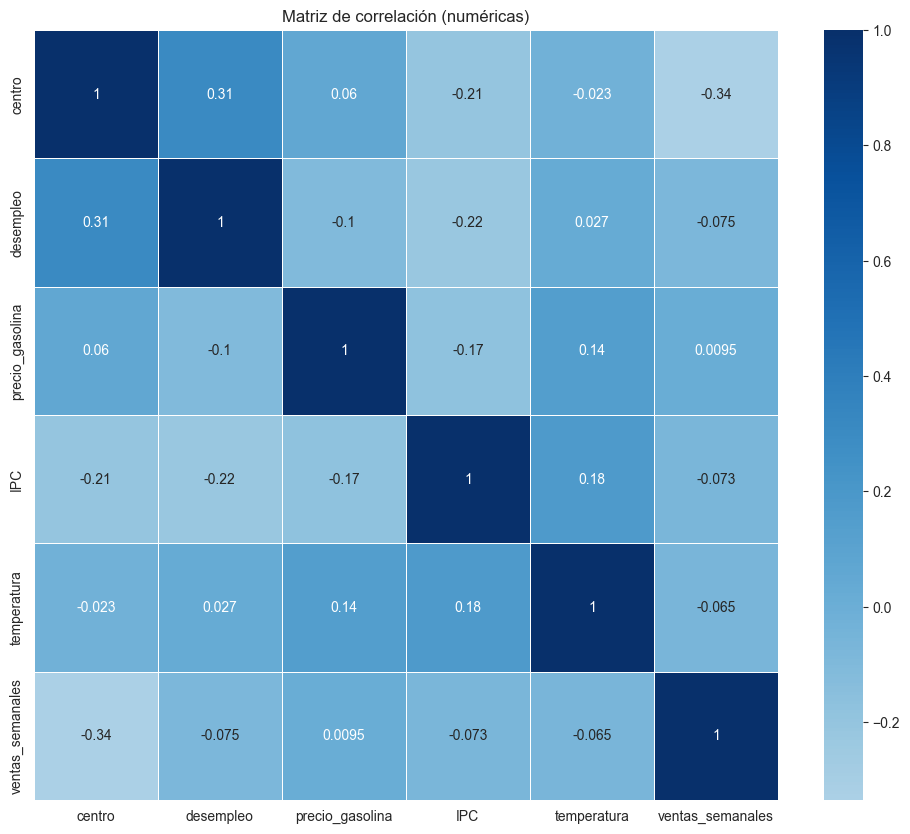

Columnas eliminadas por alta correlación: []


In [176]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. LIMPIEZA DE DATOS

# 1.1 Eliminar duplicados
df.drop_duplicates(inplace=True)

# Opción A: Eliminar filas con demasiados NaN (más del 50%)
df = df.dropna()

# Eliminar columnas inútiles (ajustar según tu caso)
columnas_a_eliminar = ['id', 'nombre']  # ajusta según corresponda
df.drop(columns=columnas_a_eliminar, inplace=True, errors='ignore')

# Actualizar listas predictoras después de eliminar columnas innecesarias
nf = [col for col in nf if col not in columnas_a_eliminar]
cf = [col for col in cf if col not in columnas_a_eliminar]

# 2. TRATAMIENTO DE OUTLIERS
# Reemplazar outliers por NaN en variables numéricas
for col in nf:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df[col] = np.where((df[col] < lower) | (df[col] > upper), np.nan, df[col])

# 3. PREPROCESADOR (ColumnTransformer)
preprocesador = ColumnTransformer(transformers=[
    # Para columnas numéricas
    ('num', Pipeline([
        ('imputador', SimpleImputer(strategy='mean')),  # Imputación de valores faltantes
        ('escalado', StandardScaler())  # Estandarización
    ]), nf),
    # Para columnas categóricas
    ('cat', Pipeline([
        ('imputador', SimpleImputer(strategy='most_frequent')),  # Imputación en valores categóricos
        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificación one-hot
    ]), cf)
])

# 4. MATRIZ DE CORRELACIÓN (solo con numéricas)
corr = df[nf + [target]].corr()

# Visualizar mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='Blues', center=0, linewidths=.5)
plt.title('Matriz de correlación (numéricas)')
plt.show()

# 5. ELIMINAR VARIABLES CON CORRELACIÓN > 0.6 ENTRE ELLAS (sin contar con el target)
# Correlación absoluta entre las variables numéricas
corr_matrix = corr.abs()

# Selección de columnas con alta correlación entre las variables predictoras (sin incluir target)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
cols_to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]

# Eliminar las columnas del DataFrame y de las listas
df.drop(columns=cols_to_drop, inplace=True)
nf = [col for col in nf if col not in cols_to_drop]
cf = [col for col in cf if col not in cols_to_drop]

# Mostrar las columnas que se eliminaron
print("Columnas eliminadas por alta correlación:", cols_to_drop)


TERCERA ETAPA: PARTICIONAR DATOS


 • Inicializa a partir de ahora todos los procesos aleatorios con una semilla aleatoria obtenida
como
<letras_de_tu_nombre>
concatenar
<letras_apellido1>
concatenar
<letras_apellido2>, por ejemplo en mi caso sería 449 (Jose = 4, Rosa=4, Rodríguez=9).


• Deja para entrenamiento el 80% de los datos y divide en train y test.

In [177]:
df.isnull().sum()


centro                0
ventas_semanales      0
festivo               0
temperatura           3
precio_gasolina       0
IPC                   0
desempleo           481
dia_semana            0
mes                   0
año                   0
dtype: int64

In [178]:
#df.dropna(subset=['desempleo', 'temperatura'], inplace=True)


In [179]:
from sklearn.model_selection import train_test_split

semilla = 675

X = df[predictoras]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=semilla)


CUARTA ETAPA: ENTRENAMIENTO Y SELECCIÓN DE MODELOS

• Vamos a realizar esta etapa de forma manual. Definimos en un diccionario llamado regresores
todos los regresores que vamos a entrenar metidos en un Pipeline donde primero aplicamos el
preproceso a los datos y luego entrenamos/predecimos con el modelo.

In [180]:
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Definir los diferentes regresores
# Redefinir regresores incluyendo el preprocesador completo
regresores = {
    'SVR (linear)': Pipeline([
        ('preprocesado', preprocesador),
        ('regresor', SVR(kernel='linear', C=1.0, epsilon=0.1))
    ]),
    'SVR (poly)': Pipeline([
        ('preprocesado', preprocesador),
        ('regresor', SVR(kernel='poly', C=1.0, epsilon=0.1))
    ]),
    'SVR (rbf)': Pipeline([
        ('preprocesado', preprocesador),
        ('regresor', SVR(kernel='rbf', C=1.0, epsilon=0.1))
    ]),
    'NuSVR': Pipeline([
        ('preprocesado', preprocesador),
        ('regresor', NuSVR(nu=0.5, kernel='rbf', C=1.0))
    ]),
    'LinearSVR': Pipeline([
        ('preprocesado', preprocesador),
        ('regresor', LinearSVR(C=1.0, epsilon=0.1, random_state=449))
    ]),
    'Linear Regression': Pipeline([
        ('preprocesado', preprocesador),
        ('regresor', LinearRegression())
    ]),
    'Ridge': Pipeline([
        ('preprocesado', preprocesador),
        ('regresor', Ridge(alpha=1.0))
    ]),
    'Lasso': Pipeline([
        ('preprocesado', preprocesador),
        ('regresor', Lasso(alpha=0.1))
    ]),
    'Random Forest': Pipeline([
        ('preprocesado', preprocesador),
        ('regresor', RandomForestRegressor(n_estimators=100, random_state=449))
    ]),
    'Gradient Boosting': Pipeline([
        ('preprocesado', preprocesador),
        ('regresor', GradientBoostingRegressor(n_estimators=100, random_state=449))
    ]),
    'K-Neighbors': Pipeline([
        ('preprocesado', preprocesador),
        ('regresor', KNeighborsRegressor(n_neighbors=5))
    ]),
    'Decision Tree': Pipeline([
        ('preprocesado', preprocesador),
        ('regresor', DecisionTreeRegressor(random_state=449))
    ])
}


 • Ahora definimos listas (mse_train, mse_test, r2_train, r2_test) para registrar el error que
comete cada modelo con train y con test para poder comprobar el desempeño de cada uno y
detectar situaciones no deseables. Completa o adapta el código para generar salida como esta:


C:\Users\ESP\Desktop\MachineLearning\saa\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.164e+13, tolerance: 1.652e+11
  model = cd_fast.enet_coordinate_descent(


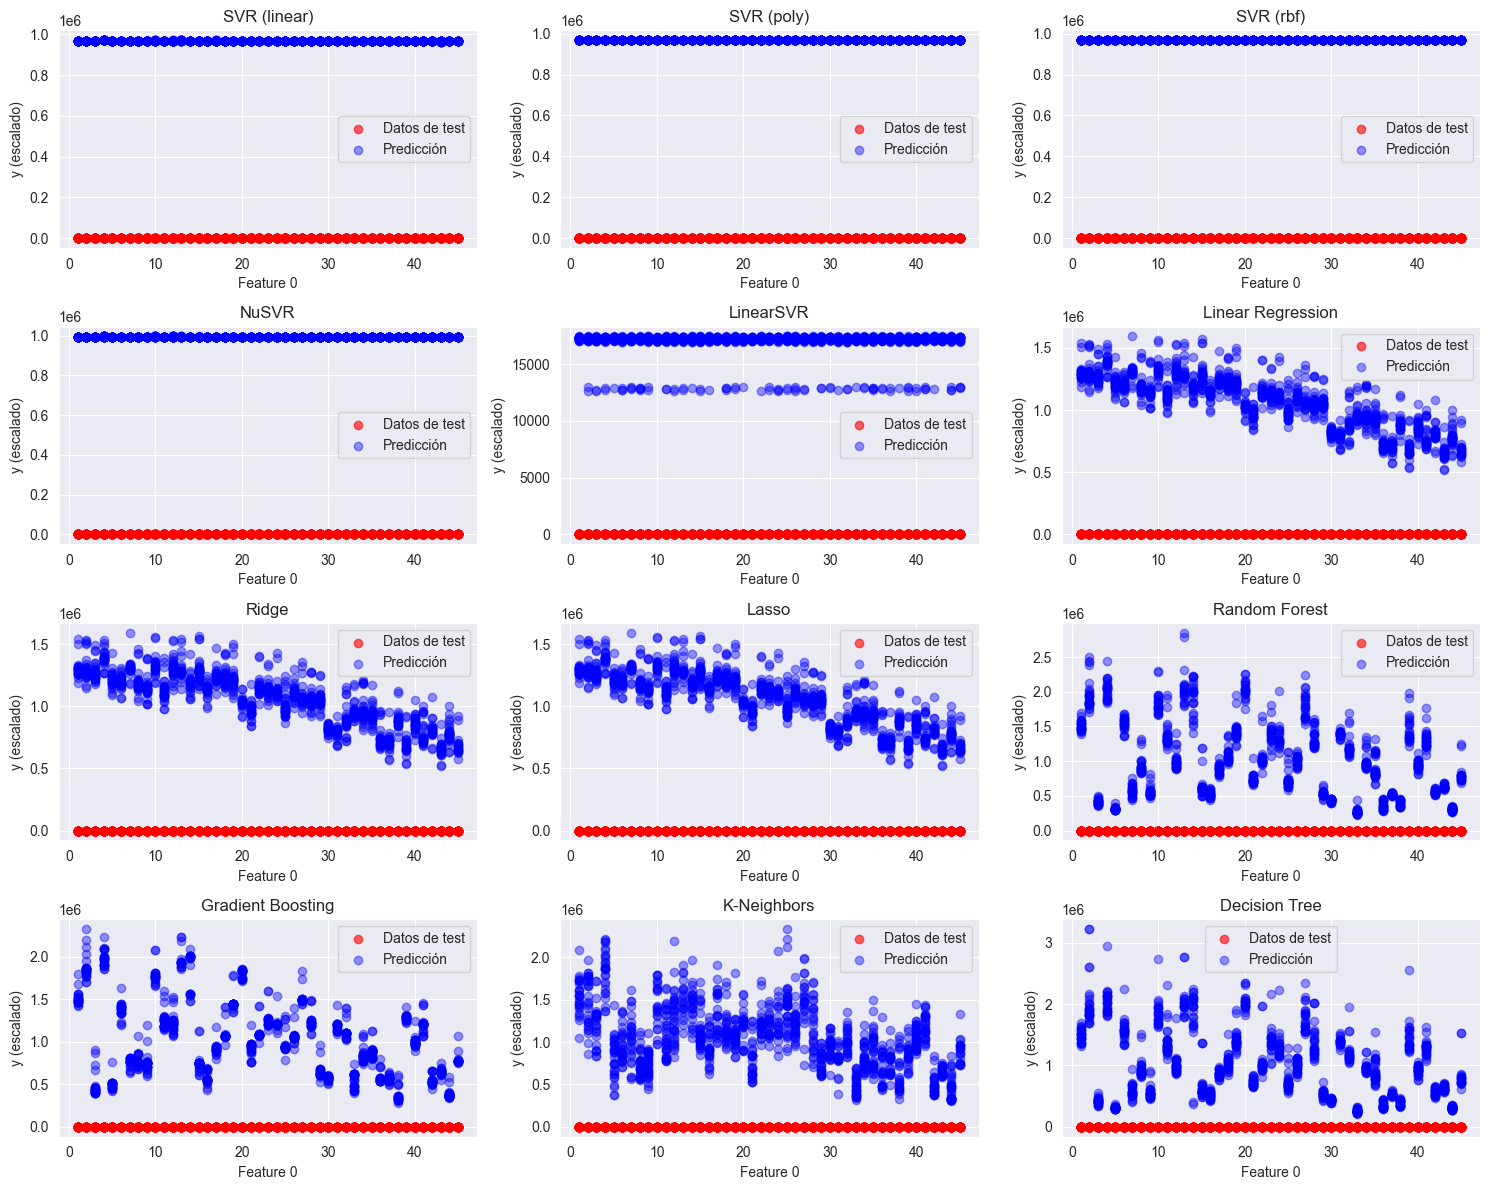

In [181]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

mse_train = []
mse_test = []
r2_train = []
r2_test = []

plt.figure(figsize=(15, 12))

for i, (nombre, modelo) in enumerate(regresores.items()):
    modelo.fit(X_train, y_train)
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)

    mse_train.append(mean_squared_error(y_train, y_pred_train))
    mse_test.append(mean_squared_error(y_test, y_pred_test))
    r2_train.append(r2_score(y_train, y_pred_train))
    r2_test.append(r2_score(y_test, y_pred_test))


    # Graficar usando solo la primera columna de X_test
    plt.subplot(4, 3, i + 1)
    plt.scatter(X_test.iloc[:, 0], y_test_escalado, color='red', label='Datos de test', alpha=0.6)
    plt.scatter(X_test.iloc[:, 0], y_pred_test, color='blue', alpha=0.4, label='Predicción')
    plt.xlabel('Feature 0')
    plt.ylabel('y (escalado)')
    plt.title(nombre)
    plt.legend()

plt.tight_layout()
plt.show()


 • Además de imprimir los scores (MSE y R2) para cada modelo y registrarlos en las listas, vas a
generar un gráfico donde se vea:

 ◦ Un scatter de color rojo que representa cada valor de y_test. Esto genera una línea recta de
color rojo formada por los valores de test: los puntos (y_test, y_test) siempre ocuparán
la diagonal del gráfico.

 ◦ Otro scatter de color azul representa cada valor de y_test y cada valor predicho para ese
y_test. Así podremos hacernos una idea de cómo de próximas están las predicciones del
regresor a sus valores reales.

 ◦ Puedes seleccionar uno de los gráficos del plt.figure(figsize=(12,10)) de la línea 7
ejecutando antes de crear los gráficos, la sentencia plt.subplot(5,3,i+1) dentro del bucle.

 • Fuera del bucle vamos a comparar el MSE de los modelos con un gráfico de barras donde se vea
train y test. Esto nos ayudará a detectar posibles underfitting y overfitting y ver desempeño de
los modelos.


 ENTREGA 4: Muestra:

 a) Etapas y pasos de la actividad con el texto, el código y los gráficos y resultados que se
generan en un notebook de Jupyter.

 b) Responde mirando tu gráfico de MSE:

 • El peor modelo parece ser: Lasso

• El mejor modelo parece ser: Random Forest

• Cuál es el que tiene más overfitting: LinearRegression

•De manera similar haz un gráfico de barras donde aparezca el R2 de cada modelo.


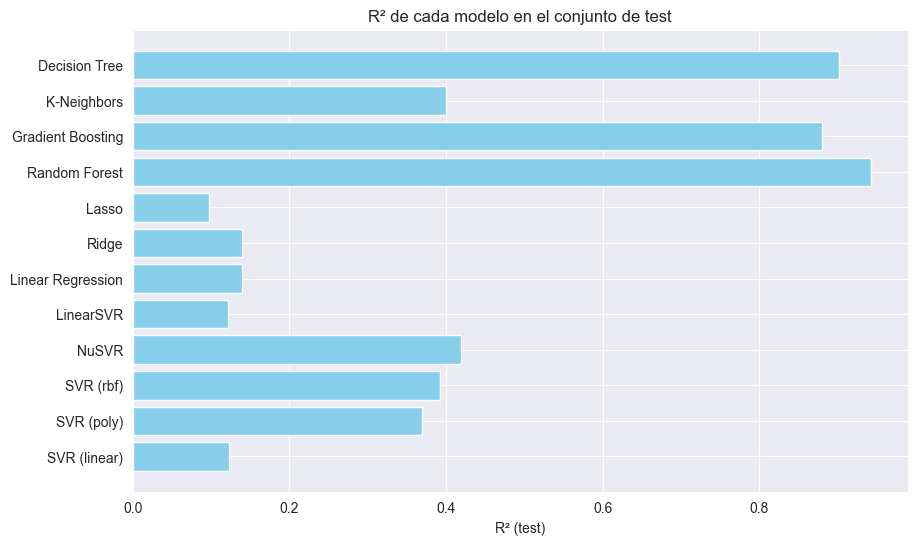

In [182]:
# Listas para almacenar nombres y valores de R²
nombres_modelos = []
r2_test_values = []

# Evaluar cada modelo
for nombre, modelo in regresores.items():
    modelo.fit(X_train, y_train_escalado)

    y_pred_test = modelo.predict(X_test)

    # Almacenar el nombre del modelo y su R² en el conjunto de test
    nombres_modelos.append(nombre)
    r2_test_values.append(r2_score(y_test_escalado, y_pred_test))

# Crear gráfico de barras con R² para cada modelo
plt.figure(figsize=(10, 6))
plt.barh(nombres_modelos, r2_test_values, color='skyblue')
plt.xlabel('R² (test)')
plt.title('R² de cada modelo en el conjunto de test')
plt.show()


ENTREGA 5: Responde:

 a) Responde mirando tu gráfico de R2:

 • El peor modelo y sus R2 de train y test: Lasso

• El mejor modelo y sus R2 de train y test: Random Forest

• Cuál es el que tiene más overfitting: Linear Regression

•Escoge uno de los modelos de máquinas de soporte vectorial y ajusta sus hiperparámetros a mano
hasta que mejores su R2 con respecto el valor inicial.

 •Si K-NN tiene overfitting, intenta mejorar la configuración del modelo de la misma forma.

In [183]:
from sklearn.impute import SimpleImputer

# Crear un imputador que reemplaza los valores nulos con la media de cada columna
imputer = SimpleImputer(strategy='mean')

# Ajustar el imputador y transformar los datos de 'X'
X_imputed = imputer.fit_transform(X)


In [184]:
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Crear un imputador que reemplaza los valores nulos con la media de cada columna
imputer = SimpleImputer(strategy='mean')

# Ajustar el imputador y transformar los datos de 'X'
X_imputed = imputer.fit_transform(X)

# Separar datos
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Escalar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ajuste manual de hiperparámetros
svr_model = SVR(kernel='rbf', C=100, epsilon=0.01)
svr_model.fit(X_train_scaled, y_train)

# Predicción y evaluación
y_pred_train = svr_model.predict(X_train_scaled)
y_pred_test = svr_model.predict(X_test_scaled)

r2_train_svr = r2_score(y_train, y_pred_train)
r2_test_svr = r2_score(y_test, y_pred_test)

print(f"R² en el conjunto de entrenamiento: {r2_train_svr:.4f}")
print(f"R² en el conjunto de test: {r2_test_svr:.4f}")


R² en el conjunto de entrenamiento: -0.0150
R² en el conjunto de test: -0.0199


In [185]:
import pandas as pd
import numpy as np

# Verificar si hay valores nulos
print("¿Hay valores nulos en X?", pd.isnull(X).sum().sum())  # Reemplaza X con tu conjunto de características
print("¿Hay valores nulos en y?", pd.isnull(y).sum())

# Verificar dimensiones de X y y
print(f"Dimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")

# Si X o y tienen dimensiones incorrectas, deberías revisarlas o corregirlas.
# Asegúrate de que X sea 2D y y sea 1D.


¿Hay valores nulos en X? 484
¿Hay valores nulos en y? 0
Dimensiones de X: (6435, 9)
Dimensiones de y: (6435,)


In [186]:
from sklearn.neighbors import KNeighborsRegressor

# KNN mejorado
knn_mejorado = KNeighborsRegressor(n_neighbors=8)  # Mayor número de vecinos
knn_mejorado.fit(X_train_scaled, y_train)

# Predicción
y_pred_train_knn = knn_mejorado.predict(X_train_scaled)
y_pred_test_knn = knn_mejorado.predict(X_test_scaled)

# Métricas
r2_train_knn = r2_score(y_train, y_pred_train_knn)
r2_test_knn = r2_score(y_test, y_pred_test_knn)

print(f"K-NN Mejorado -> R² train: {r2_train_knn:.4f}, R² test: {r2_test_knn:.4f}")


K-NN Mejorado -> R² train: 0.6630, R² test: 0.5330


ENTREGA 6: Muestra:

 a) Nombre del modelo SVR que has escogido.

 b) MSE y R2 original del SVR:

c) Código que realice los cambios a la configuración de los modelos SVR y K-NN, los entrene y
calcule sus nuevos scores.

 d) Gráfico de puntos de datos de test y predicciones de ambos.

 e) MSE y R2 mejorado de ambos:


In [187]:
# a)
svr_model = SVR(kernel='rbf', C=100, epsilon=0.01)

In [188]:
# b)
from sklearn.metrics import mean_squared_error

mse_train_svr = mean_squared_error(y_train, y_pred_train)
mse_test_svr = mean_squared_error(y_test, y_pred_test)

print(f"MSE (entrenamiento): {mse_train_svr:.4f}")
print(f"MSE (test): {mse_test_svr:.4f}")
print(f"R² (entrenamiento): {r2_train_svr:.4f}")
print(f"R² (test): {r2_test_svr:.4f}")


MSE (entrenamiento): 322285954112.7150
MSE (test): 328555914524.2404
R² (entrenamiento): -0.0150
R² (test): -0.0199


In [189]:
# c)
# SVR mejorado
svr_mejorado = SVR(kernel='rbf', C=200, epsilon=0.005)
svr_mejorado.fit(X_train_scaled, y_train)
y_pred_svr = svr_mejorado.predict(X_test_scaled)

# KNN mejorado
knn_mejorado = KNeighborsRegressor(n_neighbors=3)
knn_mejorado.fit(X_train_scaled, y_train)
y_pred_knn = knn_mejorado.predict(X_test_scaled)

# Calcular métricas
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)


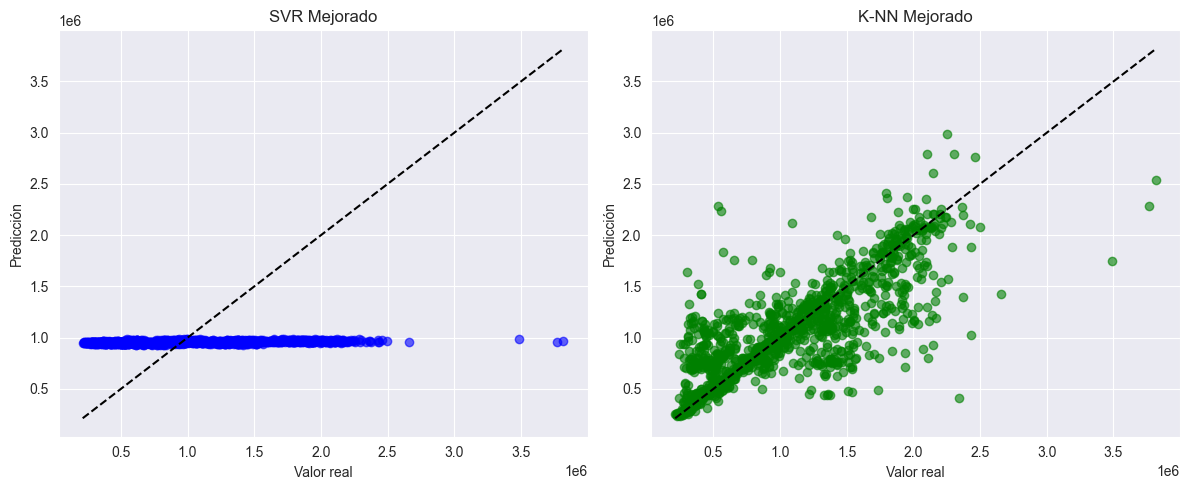

In [190]:
# d)
plt.figure(figsize=(12, 5))

# SVR
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_svr, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("SVR Mejorado")

# K-NN
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_knn, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("K-NN Mejorado")

plt.tight_layout()
plt.show()


In [191]:
# e)
print(f"SVR Mejorado -> MSE: {mse_svr:.4f}, R²: {r2_svr:.4f}")
print(f"KNN Mejorado -> MSE: {mse_knn:.4f}, R²: {r2_knn:.4f}")


SVR Mejorado -> MSE: 326068725949.1417, R²: -0.0121
KNN Mejorado -> MSE: 122873022424.0258, R²: 0.6186
